In [2]:
%pylab inline
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

Populating the interactive namespace from numpy and matplotlib


In [3]:
server_data = pd.read_csv('data.gz', sep=';', header = None)
server_data.columns = ['date', 'hour', 'method', 'content', 'protocol', 'domain', 'code', 'size', 'target']

In [4]:
server_data.head(10)

,date,hour,method,content,protocol,domain,code,size,target
0,808095600,52609.0,GET,/images/USA-logosmall.gif,HTTP/1.0,163.205.166.17,304,0,1
1,808009200,16781.0,GET,/history/apollo/as-202/as-202-patch-small.gif,HTTP/1.0,nikita.cst.cnes.fr,200,20647,1
2,807836400,33870.0,GET,/history/apollo/images/footprint-logo.gif,HTTP/1.0,stud323-15.teknutb.hks.se,200,4209,1
3,805590000,40317.0,GET,/shuttle/countdown/count70.gif,HTTP/1.0,129.52.103.195,200,46573,1
4,805417200,45979.0,GET,/images/ksclogo-medium.gif,HTTP/1.0,ad01-041.compuserve.com,200,5866,1
5,809650800,6349.0,GET,/history/apollo/apollo-sa.html,HTTP/1.0,ymdindy1.estec.esa.nl,200,2400,1
6,808959600,35340.0,GET,/images/WORLD-logosmall.gif,HTTP/1.0,128.217.62.2,200,669,1
7,806454000,29122.0,GET,/mdss/s_md-2.gif,HTTP/1.0,asd03-20.dial.xs4all.nl,200,15528,1
8,805590000,50293.0,GET,/shuttle/technology/images/srb_mod_compare_6-s...,HTTP/1.0,cis58-lab.santafe.cc.fl.us,200,28219,1
9,805762800,28130.0,GET,/shuttle/missions/sts-70/images/KSC-95EC-0575.jpg,HTTP/1.0,aitra.uio.no,200,147230,1


In [5]:
def print_hist(x, b= 10, lim = None, label = "default"):
    hist, bins = np.histogram(x, bins=b)
    center = (bins[:-1] + bins[1:]) / 2
    w = 1.*(amax(x) - amin(x))/b
    
    if lim != None:
        xlim(lim)
    plt.bar(center, hist, align='center', width=w)
    plt.title(label)
    plt.show()

def fill_with_mean(data, target, feat, n_sign = '-'):
    targets = unique(data[target])
    means = [mean(data[data[target] == t][data[feat] != n_sign][feat].astype(int)) for t in targets]
    print means
    for t, m in zip(targets, means):
        print t, m
        data.loc[data[target] == t, feat] = data[data[target] == t][feat].map(lambda x: m if x == n_sign else x) 



In [6]:
fill_with_mean(server_data, 'target', 'size')
server_data['size'] = server_data['size'].astype('float64')

/pio/scratch/1/i248066/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[19128.814387114497, 5465.150222486877, 11825.567815941555]
1 19128.8143871
2 5465.15022249
3 11825.5678159


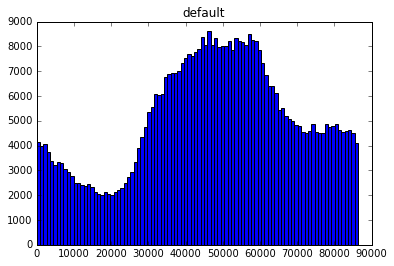

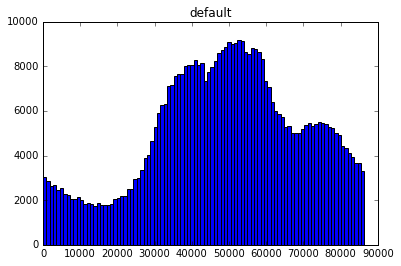

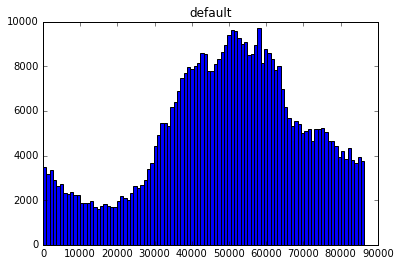

In [7]:
print_hist(server_data[server_data['target'] == 1]['hour'], b=96)
print_hist(server_data[server_data['target'] == 2]['hour'], b=96)
print_hist(server_data[server_data['target'] == 3]['hour'], b=96)

/pio/scratch/1/i248066/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


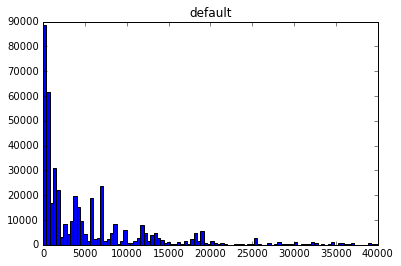

/pio/scratch/1/i248066/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


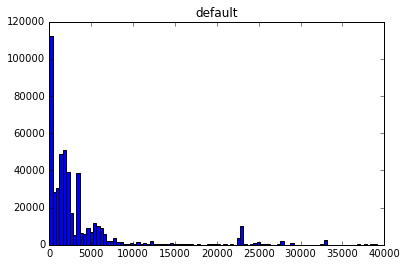

/pio/scratch/1/i248066/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


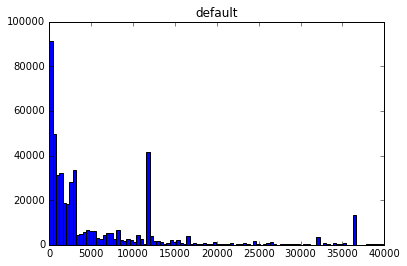

In [8]:
print_hist(server_data[server_data['target'] == 1][server_data['size'] < 40000]['size'], b=100)
print_hist(server_data[server_data['target'] == 2][server_data['size'] < 40000]['size'], b=100)
print_hist(server_data[server_data['target'] == 3][server_data['size'] < 40000]['size'], b=100)



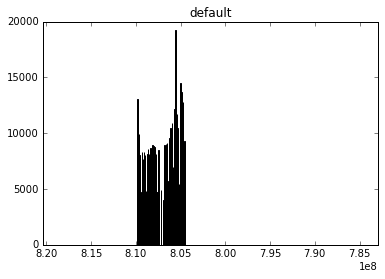

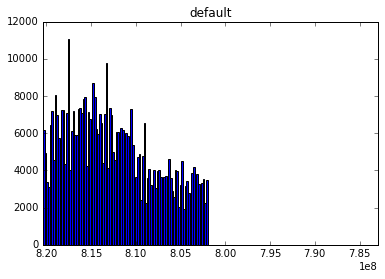

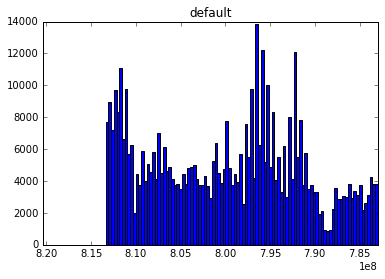

In [9]:
limes = (server_data['date'].max(), server_data['date'].min())
print_hist(server_data[server_data['target'] == 1]['date'], lim=limes, b=100)
print_hist(server_data[server_data['target'] == 2]['date'], lim=limes, b=100)
print_hist(server_data[server_data['target'] == 3]['date'], lim=limes, b=100)

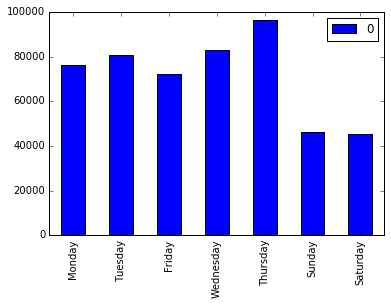

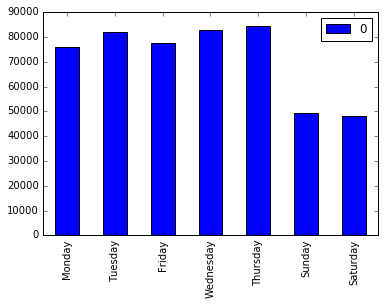

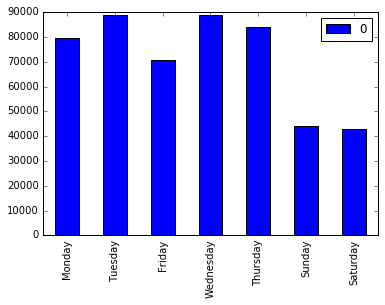

In [10]:
from collections import Counter
from datetime import datetime

def datebar(date, fmt):
    c = Counter(map(lambda d: datetime.fromtimestamp(d).strftime(fmt), date))

    d = pd.DataFrame.from_dict(c, orient='index')
    d.plot(kind='bar')
    
datebar(server_data[server_data['target'] == 1]['date'], "%A")
datebar(server_data[server_data['target'] == 2]['date'], "%A")
datebar(server_data[server_data['target'] == 3]['date'], "%A")

In [11]:
#datebar(server_data[server_data['target'] == 3]['date'], "%m.%d")

In [34]:
KNN = KNeighborsClassifier(2)

server_stand = hstack((preprocessing.scale(server_data[['date', 'hour', 'size']], axis=0),  server_data['target'].get_values().reshape(-1, 1)))
server_stand_perm = random.permutation(server_stand)

print server_stand.max(axis=0)
print server_stand.min(axis=0)

KNN.fit(server_stand_perm[:1000000, :3], server_stand_perm[:1000000, 3])
(KNN.predict(server_stand_perm[1000000:, :3]) == server_stand_perm[1000000:, 3]).mean()

Shape: (4,)
[   1.79229659    1.82112461  388.00180556    3.        ]
Shape: (4,)
[-3.01682648 -2.33593198 -0.15606764  1.        ]


0.84565211724816891

In [35]:
server_norm = hstack((preprocessing.normalize(server_data[['date', 'hour', 'size']], axis=0),  server_data['target'].get_values().reshape(-1, 1)))
server_norm_perm = random.permutation(server_norm)

print server_norm.max(axis=0)
print server_norm.min(axis=0)

KNN.fit(server_norm_perm[:1000000, :3], server_norm_perm[:1000000, 3])
(KNN.predict(server_norm_perm[1000000:, :3]) == server_norm_perm[1000000:, 3]).mean()

Shape: (4,)
[  8.30924679e-04   1.33635553e-03   3.13270855e-01   3.00000000e+00]
Shape: (4,)
[  7.93031897e-04   0.00000000e+00   0.00000000e+00   1.00000000e+00]


0.82571575800471997

In [36]:
server= server_data[['date', 'hour', 'size', 'target']]
server_perm = random.permutation(server)

print server.max(axis=0)
print server.min(axis=0)

KNN.fit(server_perm[:1000000, :3], server_perm[:1000000, 3])
(KNN.predict(server_perm[1000000:, :3]) == server_perm[1000000:, 3]).mean()

date      820364400.0
hour          86399.0
size       30193824.0
target            3.0
dtype: float64
date      782953200.0
hour              0.0
size              0.0
target            1.0
dtype: float64


0.8500432091463036

In [37]:
server_pca = decomposition.PCA(n_components=2, whiten=True).fit_transform(server_perm[:, :3])

print server_pca.max(axis=0)
print server_pca.min(axis=0)

KNN.fit(server_pca[:1000000, :3], server_perm[:1000000, 3])
(KNN.predict(server_pca[1000000:, :3]) == server_perm[1000000:, 3]).mean()

Shape: (2,)
[   3.01684167  388.08518343]
Shape: (2,)
[-1.79229712 -0.22220652]


0.86287361876099022

(1000000, 3)
(1000000, 3)
